In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Base chain with symmetric transition matrix
def base_chain(current_state):
    move = np.random.choice([-1,1])
    return current_state + move

In [3]:
# Running the base chain
current = 0
for t in range(20):
    print(current, end=" -> ")
    current = base_chain(current)

0 -> -1 -> -2 -> -1 -> 0 -> -1 -> 0 -> 1 -> 2 -> 3 -> 4 -> 3 -> 4 -> 3 -> 4 -> 5 -> 4 -> 3 -> 2 -> 1 -> 

In [4]:
# poisson(mu) distribution
def poisson_pmf(n, mu=9.0):
    if n < 0:
        return 0.0
    return np.exp(-mu)* mu**n / math.factorial(n)

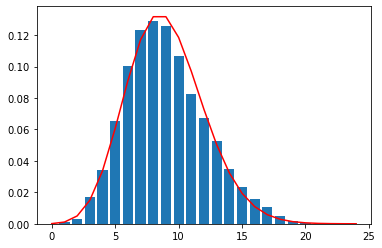

In [15]:
# Metropolis chain with target distribution Poisson(9.0)

current = 0
states_visited = []
for t in range(10000):
    proposal_state = base_chain(current)
    pi_new = poisson_pmf(proposal_state)
    pi_old = poisson_pmf(current)
    acceptance_proba = 1 if pi_new >= pi_old else pi_new/pi_old
    U = np.random.uniform()
    if U <= acceptance_proba:
        current = proposal_state
    else:
        current = current
    states_visited.append(current)
    
# states visited by the metropolis chain
states, counts = np.unique(states_visited, return_counts=True)
plt.bar(states, counts/len(states_visited))
# theoretical target distribution
plt.plot([n for n in range(0, 25)],
         [poisson_pmf(n) for n in range(0, 25)], c='red')

In [6]:
# distribution as mixture of three Poisson distribution

def mixture(n):
    return 0.25 * poisson_pmf(n, mu=2.0) \
            + 0.25 * poisson_pmf(n, mu=9.0) \
            + 0.5 * poisson_pmf(n, mu=15)

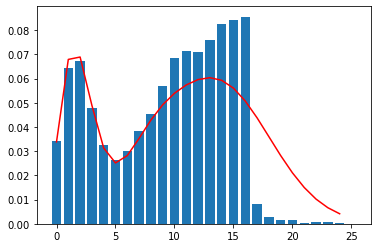

In [12]:
# Metropolis chain with target distribution as the above mixture of three Poisson

current = 0
states_visited = []
for t in range(10000):
    proposal_state = base_chain(current)
    pi_new = mixture(proposal_state)
    pi_old = mixture(current)
    acceptance_proba = 1 if pi_new >= pi_old else pi_new/pi_old
    U = np.random.uniform()
    if U <= acceptance_proba:
        current = proposal_state
    else:
        current = current
    states_visited.append(current)
    
# states visited by the metropolis chain
states, counts = np.unique(states_visited, return_counts=True)
plt.bar(states, counts/len(states_visited))
# theoretical target distribution
plt.plot([n for n in range(0, 25)],
         [mixture(n) for n in range(0, 25)], c='red')

In [8]:
# distribution as mixture of three Poisson distribution
from scipy.stats import poisson

def mixture_stable(n):
    return 0.25 * poisson.pmf(n, mu=2.0, loc=0) \
            + 0.25 * poisson.pmf(n, mu=9.0, loc=0) \
            + 0.5 * poisson.pmf(n, mu=15, loc=0)

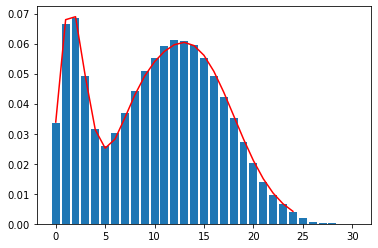

In [16]:
# Metropolis chain with target distribution the same mixture as before
# using a numerically stable function to compute the pmf

current = 0
states_visited = []
for t in range(100000):
    proposal_state = base_chain(current)
    pi_new = mixture_stable(proposal_state)
    pi_old = mixture_stable(current)
    acceptance_proba = 1 if pi_new >= pi_old else pi_new/pi_old
    U = np.random.uniform()
    if U <= acceptance_proba:
        current = proposal_state
    else:
        current = current
    states_visited.append(current)
    
# states visited by the metropolis chain
states, counts = np.unique(states_visited, return_counts=True)
plt.bar(states, counts/len(states_visited))
# theoretical target distribution
plt.plot([n for n in range(0, 25)],
         [mixture_stable(n) for n in range(0, 25)], c='red')